In [19]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.drop(columns=['Outcome', 'DiabetesPedigreeFunction'], inplace=True)
small_constant = 1e-6 

# Replace zero values with the small constant in the remaining columns
df[df.columns] = df[df.columns].replace(0, small_constant)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.000000,148.0,72.0,35.000000,0.000001,33.6,50
1,1.000000,85.0,66.0,29.000000,0.000001,26.6,31
2,8.000000,183.0,64.0,0.000001,0.000001,23.3,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,21
4,0.000001,137.0,40.0,35.000000,168.000000,43.1,33


In [20]:
import skcriteria as skc 

In [21]:
matrix  = df.values.tolist()

In [22]:
# Let's say we want to rank on which patient is more vulnerable to diabetes
# We set maximization for - pregnancy, glucose, bp, bmi and age
# We set minimization for skin thickness, insulin

objectives = [max, max, max, min, min, max, max]
objectives

[<function max>,
 <function max>,
 <function max>,
 <function min>,
 <function min>,
 <function max>,
 <function max>]

In [23]:
# Assign weights to the conditions ( add up to 1 )

weights=[0.1, 0.2, 0.2, 0.15, 0.15, 0.1, 0.1]

In [24]:
# Create the Decision Matrix

dm = skc.mkdm(
    matrix,
    objectives,
    weights,
    criteria= ["Pregnancy", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "Age"]
)
dm

,Pregnancy[▲ 0.10],Glucose[▲ 0.20],BloodPressure[▲ 0.20],SkinThickness[▼ 0.15],Insulin[▼ 0.15],BMI[▲ 0.10],Age[▲ 0.10]
A0,6.000000,148.0,72.0,35.000000,0.000001,33.6,50.0
A1,1.000000,85.0,66.0,29.000000,0.000001,26.6,31.0
A2,8.000000,183.0,64.0,0.000001,0.000001,23.3,32.0
A3,1.000000,89.0,66.0,23.000000,94.000000,28.1,21.0
A4,0.000001,137.0,40.0,35.000000,168.000000,43.1,33.0
...,...,...,...,...,...,...,...
A763,10.000000,101.0,76.0,48.000000,180.000000,32.9,63.0
A764,2.000000,122.0,70.0,27.000000,0.000001,36.8,27.0
A765,5.000000,121.0,72.0,23.000000,112.000000,26.2,30.0
A766,1.000000,126.0,60.0,0.000001,0.000001,30.1,47.0


In [25]:
dm.matrix  # this data ignores the objectives and the weights

Criteria,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
Alternatives,,,,,,,
A0,6.000000,148.0,72.0,35.000000,0.000001,33.6,50.0
A1,1.000000,85.0,66.0,29.000000,0.000001,26.6,31.0
A2,8.000000,183.0,64.0,0.000001,0.000001,23.3,32.0
A3,1.000000,89.0,66.0,23.000000,94.000000,28.1,21.0
A4,0.000001,137.0,40.0,35.000000,168.000000,43.1,33.0
...,...,...,...,...,...,...,...
A763,10.000000,101.0,76.0,48.000000,180.000000,32.9,63.0
A764,2.000000,122.0,70.0,27.000000,0.000001,36.8,27.0
A765,5.000000,121.0,72.0,23.000000,112.000000,26.2,30.0


In [26]:
#dm.plot() 

In [27]:
#dm.plot.wheatmap()

In [28]:
from skcriteria.preprocessing import invert_objectives, scalers

# Invert minimize - 1/ criterion

inverter = invert_objectives.InvertMinimize()
dmt = inverter.transform(dm)

In [29]:
# Sum Scaler - Normalize scale (0-1)
scaler = scalers.SumScaler(target="both")
dmt = scaler.transform(dmt)


In [30]:
dmt

,Pregnancy[▲ 0.10],Glucose[▲ 0.20],BloodPressure[▲ 0.20],SkinThickness[▲ 0.15],Insulin[▲ 0.15],BMI[▲ 0.10],Age[▲ 0.10]
A0,2.031832e-03,0.001594,0.001357,1.258653e-10,2.673797e-03,0.001368,0.001959
A1,3.386387e-04,0.000915,0.001244,1.519064e-10,2.673797e-03,0.001083,0.001214
A2,2.709109e-03,0.001971,0.001206,4.405286e-03,2.673797e-03,0.000948,0.001253
A3,3.386387e-04,0.000959,0.001244,1.915342e-10,2.844465e-11,0.001144,0.000823
A4,3.386387e-10,0.001476,0.000754,1.258653e-10,1.591546e-11,0.001754,0.001293
...,...,...,...,...,...,...,...
A763,3.386387e-03,0.001088,0.001432,9.177679e-11,1.485443e-11,0.001339,0.002468
A764,6.772773e-04,0.001314,0.001319,1.631587e-10,2.673797e-03,0.001498,0.001058
A765,1.693193e-03,0.001303,0.001357,1.915342e-10,2.387319e-11,0.001066,0.001175
A766,3.386387e-04,0.001357,0.001131,4.405286e-03,2.673797e-03,0.001225,0.001841


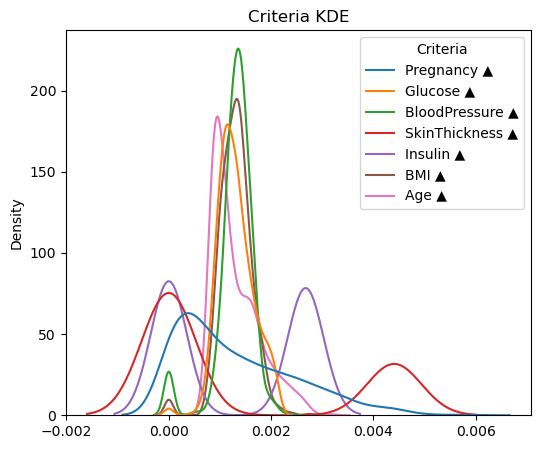

In [31]:
import matplotlib.pyplot as plt

# Create a figure for the criteria KDE plot
fig1, axs1 = plt.subplots(figsize=(6, 5))

# Plot the criteria KDE
dmt.plot.kde(ax=axs1)
axs1.set_title("Criteria KDE")

# Show the figure
plt.show()


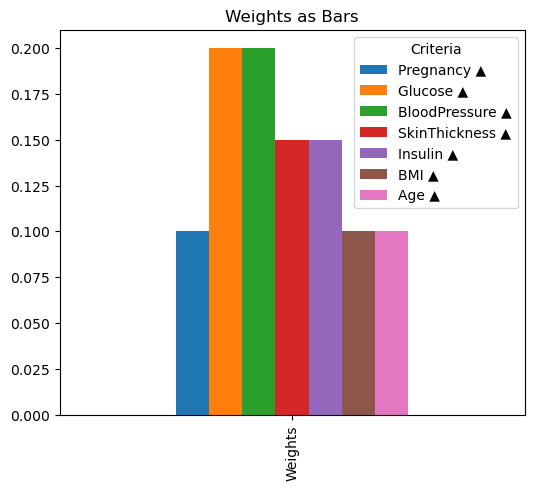

In [32]:
import matplotlib.pyplot as plt

# Create a figure for the weights as bars plot
fig2, axs2 = plt.subplots(figsize=(6, 5))

# Plot the weights as bars
dmt.plot.wbar(ax=axs2)
axs2.set_title("Weights as Bars")

# Show the figure
plt.show()


In [33]:
# Weighted Sum Model
from skcriteria.madm import simple

In [34]:
dec = simple.WeightedSumModel()
rankWS = dec.evaluate(dmt)  # we use the tansformed version of the data
rankWS


Alternatives,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73,A74,A75,A76,A77,A78,A79,A80,A81,A82,A83,A84,A85,A86,A87,A88,A89,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99,A100,A101,A102,A103,A104,A105,A106,A107,A108,A109,A110,A111,A112,A113,A114,A115,A116,A117,A118,A119,A120,A121,A122,A123,A124,A125,A126,A127,A128,A129,A130,A131,A132,A133,A134,A135,A136,A137,A138,A139,A140,A141,A142,A143,A144,A145,A146,A147,A148,A149,A150,A151,A152,A153,A154,A155,A156,A157,A158,A159,A160,A161,A162,A163,A164,A165,A166,A167,A168,A169,A170,A171,A172,A173,A174,A175,A176,A177,A178,A179,A180,A181,A182,A183,A184,A185,A186,A187,A188,A189,A190,A191,A192,A193,A194,A195,A196,A197,A198,A199,A200,A201,A202,A203,A204,A205,A206,A207,A208,A209,A210,A211,A212,A213,A214,A215,A216,A217,A218,A219,A220,A221,A222,A223,A224,A225,A226,A227,A228,A229,A230,A231,A232,A233,A234,A235,A236,A237,A238,A239,A240,A241,A242,A243,A244,A245,A246,A247,A248,A249,A250,A251,A252,A253,A254,A255,A256,A257,A258,A259,A260,A261,A262,A263,A264,A265,A266,A267,A268,A269,A270,A271,A272,A273,A274,A275,A276,A277,A278,A279,A280,A281,A282,A283,A284,A285,A286,A287,A288,A289,A290,A291,A292,A293,A294,A295,A296,A297,A298,A299,A300,A301,A302,A303,A304,A305,A306,A307,A308,A309,A310,A311,A312,A313,A314,A315,A316,A317,A318,A319,A320,A321,A322,A323,A324,A325,A326,A327,A328,A329,A330,A331,A332,A333,A334,A335,A336,A337,A338,A339,A340,A341,A342,A343,A344,A345,A346,A347,A348,A349,A350,A351,A352,A353,A354,A355,A356,A357,A358,A359,A360,A361,A362,A363,A364,A365,A366,A367,A368,A369,A370,A371,A372,A373,A374,A375,A376,A377,A378,A379,A380,A381,A382,A383,A384,A385,A386,A387,A388,A389,A390,A391,A392,A393,A394,A395,A396,A397,A398,A399,A400,A401,A402,A403,A404,A405,A406,A407,A408,A409,A410,A411,A412,A413,A414,A415,A416,A417,A418,A419,A420,A421,A422,A423,A424,A425,A426,A427,A428,A429,A430,A431,A432,A433,A434,A435,A436,A437,A438,A439,A440,A441,A442,A443,A444,A445,A446,A447,A448,A449,A450,A451,A452,A453,A454,A455,A456,A457,A458,A459,A460,A461,A462,A463,A464,A465,A466,A467,A468,A469,A470,A471,A472,A473,A474,A475,A476,A477,A478,A479,A480,A481,A482,A483,A484,A485,A486,A487,A488,A489,A490,A491,A492,A493,A494,A495,A496,A497,A498,A499,A500,A501,A502,A503,A504,A505,A506,A507,A508,A509,A510,A511,A512,A513,A514,A515,A516,A517,A518,A519,A520,A521,A522,A523,A524,A525,A526,A527,A528,A529,A530,A531,A532,A533,A534,A535,A536,A537,A538,A539,A540,A541,A542,A543,A544,A545,A546,A547,A548,A549,A550,A551,A552,A553,A554,A555,A556,A557,A558,A559,A560,A561,A562,A563,A564,A565,A566,A567,A568,A569,A570,A571,A572,A573,A574,A575,A576,A577,A578,A579,A580,A581,A582,A583,A584,A585,A586,A587,A588,A589,A590,A591,A592,A593,A594,A595,A596,A597,A598,A599,A600,A601,A602,A603,A604,A605,A606,A607,A608,A609,A610,A611,A612,A613,A614,A615,A616,A617,A618,A619,A620,A621,A622,A623,A624,A625,A626,A627,A628,A629,A630,A631,A632,A633,A634,A635,A636,A637,A638,A639,A640,A641,A642,A643,A644,A645,A646,A647,A648,A649,A650,A651,A652,A653,A654,A655,A656,A657,A658,A659,A660,A661,A662,A663,A664,A665,A666,A667,A668,A669,A670,A671,A672,A673,A674,A675,A676,A677,A678,A679,A680,A681,A682,A683,A684,A685,A686,A687,A688,A689,A690,A691,A692,A693,A694,A695,A696,A697,A698,A699,A700,A701,A702,A703,A704,A705,A706,A707,A708,A709,A710,A711,A712,A713,A714,A715,A716,A717,A718,A719,A720,A721,A722,A723,A724,A725,A726,A727,A728,A729,A730,A731,A732,A733,A734,A735,A736,A737,A738,A739,A740,A741,A742,A743,A744,A745,A746,A747,A748,A749,A750,A751,A752,A753,A754,A755,A756,A757,A758,A759,A760,A761,A762,A763,A764,A765,A766,A767
Rank,248,420,51,740,657,121,729,150,425,56,99,17,14,464,415,191,558,100,737,608,493,42,8,255,286,382,34,739,289,72,263,498,720,117,239,609,22,250,373,467,491,39,256,259,65,312,168,429,283,228,692,757,591,297,408,506,359,566,109,691,282,55,183,625,84,314,339

In [35]:
import pandas as pd

rank_list = rankWS.rank_
rank_alternatives = rankWS.alternatives

rank_df_ws = pd.DataFrame({
    'Rank': rank_list,
    'Candidate': rank_alternatives
})

# Sort the DataFrame by rank in ascending order
rank_df = rank_df.sort_values(by='Rank', ascending=True)
rank_df = rank_df.reset_index(drop=True)

print(rank_df_ws)


NameError: name 'rank_df' is not defined

In [36]:
# TOPSIS
from skcriteria.madm import similarity  
from skcriteria.pipeline import mkpipe  


In [37]:
pipe = mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.VectorScaler(target="matrix"),  # this scaler transform the matrix
    scalers.SumScaler(target="weights"),  # and this transform the weights
    similarity.TOPSIS(),
)

pipe

<SKCPipeline [steps=[('negateminimize', <NegateMinimize []>), ('vectorscaler', <VectorScaler [target='matrix']>), ('sumscaler', <SumScaler [target='weights']>), ('topsis', <TOPSIS [metric='euclidean']>)]]>

In [296]:
rankTOPSIS = pipe.evaluate(dm)
rankTOPSIS

Alternatives,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73,A74,A75,A76,A77,A78,A79,A80,A81,A82,A83,A84,A85,A86,A87,A88,A89,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99,A100,A101,A102,A103,A104,A105,A106,A107,A108,A109,A110,A111,A112,A113,A114,A115,A116,A117,A118,A119,A120,A121,A122,A123,A124,A125,A126,A127,A128,A129,A130,A131,A132,A133,A134,A135,A136,A137,A138,A139,A140,A141,A142,A143,A144,A145,A146,A147,A148,A149,A150,A151,A152,A153,A154,A155,A156,A157,A158,A159,A160,A161,A162,A163,A164,A165,A166,A167,A168,A169,A170,A171,A172,A173,A174,A175,A176,A177,A178,A179,A180,A181,A182,A183,A184,A185,A186,A187,A188,A189,A190,A191,A192,A193,A194,A195,A196,A197,A198,A199,A200,A201,A202,A203,A204,A205,A206,A207,A208,A209,A210,A211,A212,A213,A214,A215,A216,A217,A218,A219,A220,A221,A222,A223,A224,A225,A226,A227,A228,A229,A230,A231,A232,A233,A234,A235,A236,A237,A238,A239,A240,A241,A242,A243,A244,A245,A246,A247,A248,A249,A250,A251,A252,A253,A254,A255,A256,A257,A258,A259,A260,A261,A262,A263,A264,A265,A266,A267,A268,A269,A270,A271,A272,A273,A274,A275,A276,A277,A278,A279,A280,A281,A282,A283,A284,A285,A286,A287,A288,A289,A290,A291,A292,A293,A294,A295,A296,A297,A298,A299,A300,A301,A302,A303,A304,A305,A306,A307,A308,A309,A310,A311,A312,A313,A314,A315,A316,A317,A318,A319,A320,A321,A322,A323,A324,A325,A326,A327,A328,A329,A330,A331,A332,A333,A334,A335,A336,A337,A338,A339,A340,A341,A342,A343,A344,A345,A346,A347,A348,A349,A350,A351,A352,A353,A354,A355,A356,A357,A358,A359,A360,A361,A362,A363,A364,A365,A366,A367,A368,A369,A370,A371,A372,A373,A374,A375,A376,A377,A378,A379,A380,A381,A382,A383,A384,A385,A386,A387,A388,A389,A390,A391,A392,A393,A394,A395,A396,A397,A398,A399,A400,A401,A402,A403,A404,A405,A406,A407,A408,A409,A410,A411,A412,A413,A414,A415,A416,A417,A418,A419,A420,A421,A422,A423,A424,A425,A426,A427,A428,A429,A430,A431,A432,A433,A434,A435,A436,A437,A438,A439,A440,A441,A442,A443,A444,A445,A446,A447,A448,A449,A450,A451,A452,A453,A454,A455,A456,A457,A458,A459,A460,A461,A462,A463,A464,A465,A466,A467,A468,A469,A470,A471,A472,A473,A474,A475,A476,A477,A478,A479,A480,A481,A482,A483,A484,A485,A486,A487,A488,A489,A490,A491,A492,A493,A494,A495,A496,A497,A498,A499,A500,A501,A502,A503,A504,A505,A506,A507,A508,A509,A510,A511,A512,A513,A514,A515,A516,A517,A518,A519,A520,A521,A522,A523,A524,A525,A526,A527,A528,A529,A530,A531,A532,A533,A534,A535,A536,A537,A538,A539,A540,A541,A542,A543,A544,A545,A546,A547,A548,A549,A550,A551,A552,A553,A554,A555,A556,A557,A558,A559,A560,A561,A562,A563,A564,A565,A566,A567,A568,A569,A570,A571,A572,A573,A574,A575,A576,A577,A578,A579,A580,A581,A582,A583,A584,A585,A586,A587,A588,A589,A590,A591,A592,A593,A594,A595,A596,A597,A598,A599,A600,A601,A602,A603,A604,A605,A606,A607,A608,A609,A610,A611,A612,A613,A614,A615,A616,A617,A618,A619,A620,A621,A622,A623,A624,A625,A626,A627,A628,A629,A630,A631,A632,A633,A634,A635,A636,A637,A638,A639,A640,A641,A642,A643,A644,A645,A646,A647,A648,A649,A650,A651,A652,A653,A654,A655,A656,A657,A658,A659,A660,A661,A662,A663,A664,A665,A666,A667,A668,A669,A670,A671,A672,A673,A674,A675,A676,A677,A678,A679,A680,A681,A682,A683,A684,A685,A686,A687,A688,A689,A690,A691,A692,A693,A694,A695,A696,A697,A698,A699,A700,A701,A702,A703,A704,A705,A706,A707,A708,A709,A710,A711,A712,A713,A714,A715,A716,A717,A718,A719,A720,A721,A722,A723,A724,A725,A726,A727,A728,A729,A730,A731,A732,A733,A734,A735,A736,A737,A738,A739,A740,A741,A742,A743,A744,A745,A746,A747,A748,A749,A750,A751,A752,A753,A754,A755,A756,A757,A758,A759,A760,A761,A762,A763,A764,A765,A766,A767
Rank,180,469,53,576,700,135,614,264,764,64,118,14,9,768,337,353,733,94,675,546,706,40,13,178,171,195,31,592,56,82,164,697,385,128,115,687,18,189,536,702,306,36,102,261,67,444,243,453,237,452,419,456,284,650,743,449,712,716,168,695,597,43,262,626,85,254,373,

In [297]:
import pandas as pd

rank_list = rankTOPSIS.rank_
rank_alternatives = rankTOPSIS.alternatives

rank_df_topsis = pd.DataFrame({
    'Rank': rank_list,
    'Candidate': rank_alternatives
})

# Sort the DataFrame by rank in ascending order
rank_df = rank_df.sort_values(by='Rank', ascending=True)
rank_df = rank_df.reset_index(drop=True)

print(rank_df_topsis)


     Rank Candidate
0     180        A0
1     469        A1
2      53        A2
3     576        A3
4     700        A4
..    ...       ...
763   589      A763
764   313      A764
765   351      A765
766   221      A766
767   471      A767

[768 rows x 2 columns]


In [300]:
#TOPSIS Metrics

print(rankTOPSIS.e_)
print("Ideal:", rankTOPSIS.e_.ideal)
print("Anti-Ideal:", rankTOPSIS.e_.anti_ideal)
#print("Similarity index:", rankTOPSIS.e_.similarity)

<extra {'anti_ideal', 'similarity', 'ideal'}>
Ideal: [ 1.20019271e-02  1.14850795e-02  1.22692266e-02 -2.08196428e-10
 -3.86304800e-11  7.34862646e-03  8.29000838e-03]
Anti-Ideal: [ 7.05995712e-10  5.77139676e-11  1.00567431e-10 -2.06114464e-02
 -3.26813861e-02  1.09517533e-10  2.14926143e-03]


In [305]:
# Comparing candidate rank WS vs TOPSIS
import pandas as pd

# Merge the two DataFrames on the "Candidate" column
rank_comparison = pd.merge(rank_df_ws, rank_df_topsis, on='Candidate', suffixes=('_WS', '_Topsis'))

# Extract the "Candidate" column and convert it to integers
rank_comparison['Candidate'] = rank_comparison['Candidate'].str.extract('(\d+)').astype(int)

rank_comparison = rank_comparison.sort_values(by='Candidate')
rank_comparison = rank_comparison.reset_index(drop=True)



In [306]:
rank_comparison

,Rank_WS,Candidate,Rank_Topsis
0,248,0,180
1,420,1,469
2,51,2,53
3,740,3,576
4,657,4,700
...,...,...,...
763,351,763,589
764,337,764,313
765,527,765,351
766,152,766,221
